In [ ]:
#These codes have been adapted from https://github.com/ageron/handson-ml3

# Get the Data

In [ ]:
import pandas as pd
data = pd.read_csv("https://github.com/CAWaterBoardDataCenter/DDW-Drought-Priortization-2022/raw/main/DroughtWatchPrioritization_v9_input_data.csv", header =0)

In [1]:
import pandas as pd
data2 = pd.read_csv("https://github.com/CAWaterBoardDataCenter/DDW-Drought-Priortization-2022/raw/main/DroughtWatchPrioritization_v9_input_data_with_TNC.csv", header =0)

In [2]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2866 entries, 0 to 2865
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ServiceConnections                           2866 non-null   int64  
 1   Population                                   2866 non-null   int64  
 2   Score_SourceNumber                           2866 non-null   float64
 3   Score_SourceCapacityViolations               2866 non-null   object 
 4   Score_SCM                                    2866 non-null   object 
 5   Score_CriticallyOverdraftedGroundwaterBasin  2866 non-null   object 
 6   CDAG_rank                                    2866 non-null   int64  
 7   Curtailment                                  2866 non-null   object 
 8   Score_1702                                   2866 non-null   int64  
 9   Score_1705                                   2866 non-null   int64  
 10  

In [3]:
data2["DroughtExperienced"].value_counts()

0    2710
1     156
Name: DroughtExperienced, dtype: int64

In [4]:
# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [5]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Drought_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [6]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure attribute_histogram_plots


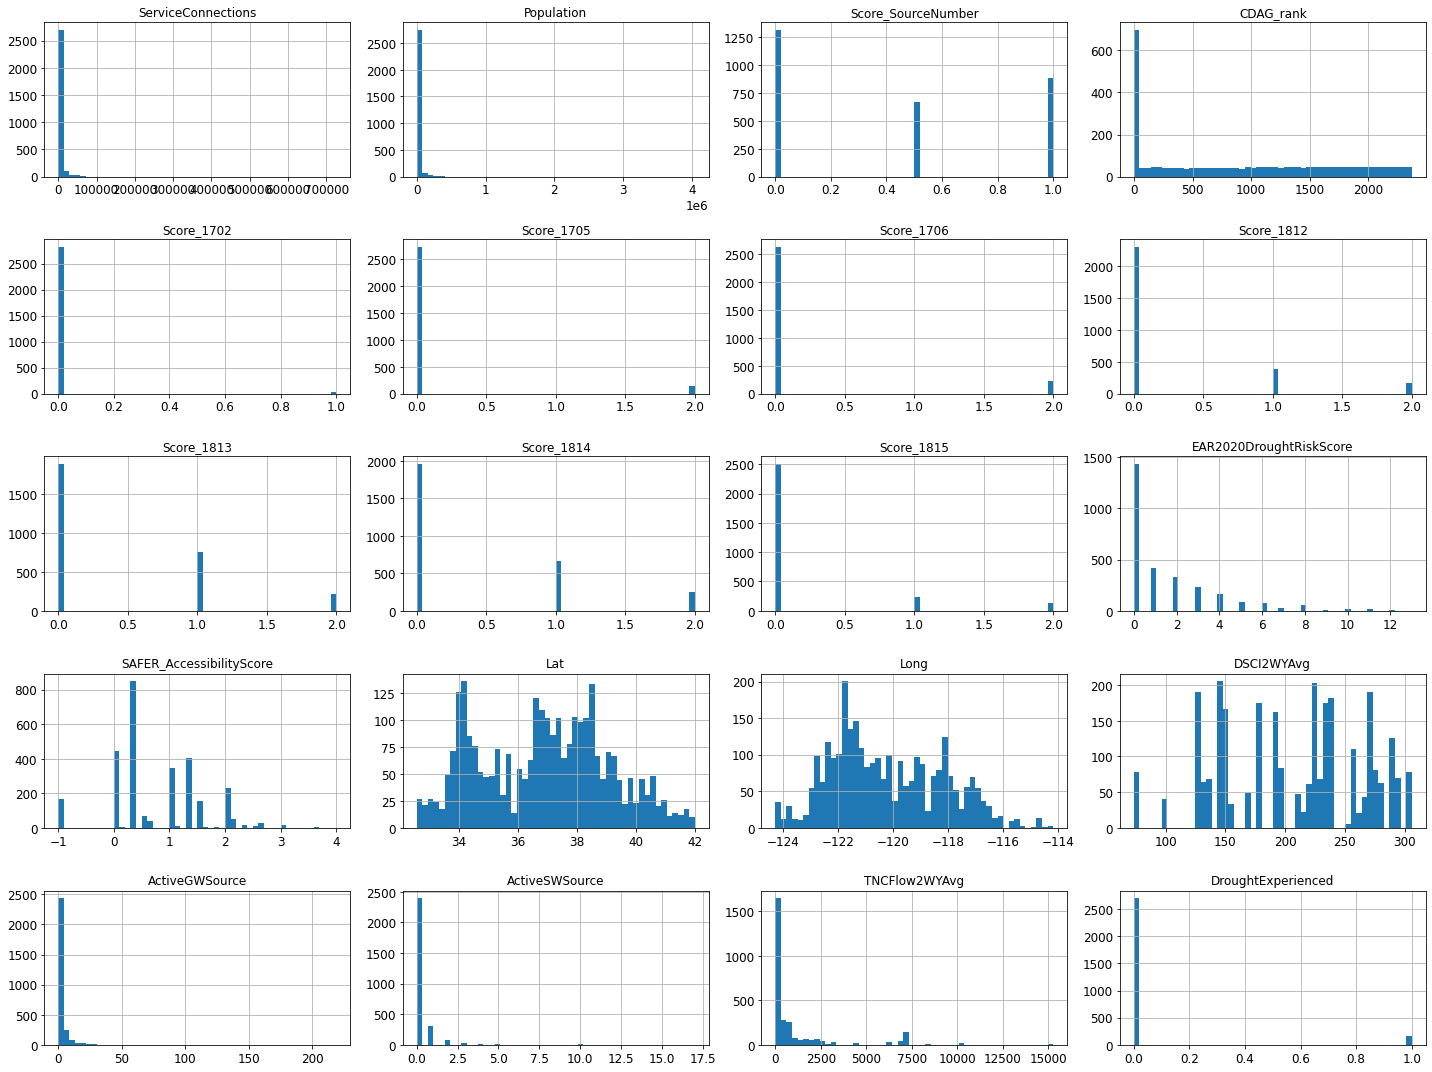

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
data2.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

## Visualizing Geographical Data

Saving figure DroughtExperienced_scatterplot


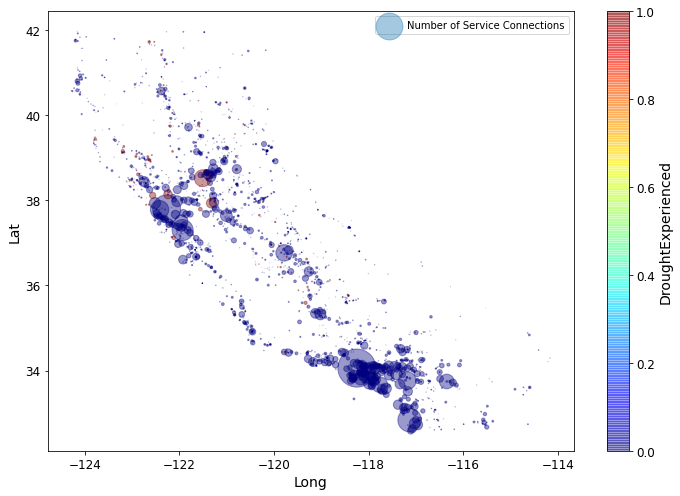

In [8]:
data2.plot(kind="scatter", x="Long", y="Lat", alpha=0.4,
             s=data2["ServiceConnections"]/500, label="Number of Service Connections", figsize=(10,7),
             c="DroughtExperienced", cmap="jet", colorbar=True, legend=True, sharex=False)
plt.legend()
save_fig("DroughtExperienced_scatterplot")

The argument `sharex=False` fixes a display bug: without it, the x-axis values and label are not displayed (see: https://github.com/pandas-dev/pandas/issues/10611).

The next cell generates a beautified version of the previous figure, with an image of California added in the background, nicer label names and no grid.

In [9]:
# Download the California image
import urllib.request
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "PWSRA")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://github.com/ageron/handson-ml3/raw/main/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/PWSRA/california.png', <http.client.HTTPMessage at 0x7fa5845845d0>)

Saving figure DroughtExperienced_plot


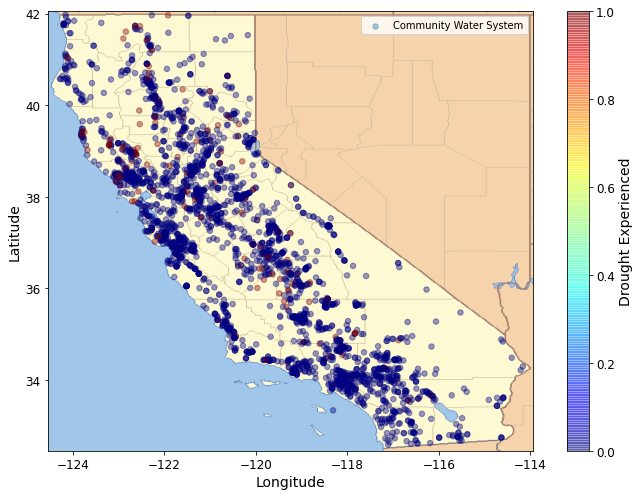

In [10]:
data_renamed = data2.rename(columns={
    "Lat": "Latitude", "Long": "Longitude",
    #"population": "Population",
    "DroughtExperienced": "Drought Experienced"})
data_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
             #s=data2["ServiceConnections"]/500, label="Number of Service Connections",
             s=30, label="Community Water System",
             c="Drought Experienced", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

save_fig("DroughtExperienced_plot")
plt.show()

In [11]:
# Separate input features and target
data_labels = data2["DroughtExperienced"]

# Dropping the target column
data2 = data2.drop(["DroughtExperienced"], axis=1)


In [12]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2866 entries, 0 to 2865
Data columns (total 35 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ServiceConnections                           2866 non-null   int64  
 1   Population                                   2866 non-null   int64  
 2   Score_SourceNumber                           2866 non-null   float64
 3   Score_SourceCapacityViolations               2866 non-null   object 
 4   Score_SCM                                    2866 non-null   object 
 5   Score_CriticallyOverdraftedGroundwaterBasin  2866 non-null   object 
 6   CDAG_rank                                    2866 non-null   int64  
 7   Curtailment                                  2866 non-null   object 
 8   Score_1702                                   2866 non-null   int64  
 9   Score_1705                                   2866 non-null   int64  
 10  

In [13]:
data_labels

0       0
1       0
2       0
3       0
4       0
       ..
2861    0
2862    0
2863    0
2864    0
2865    0
Name: DroughtExperienced, Length: 2866, dtype: int64

In [14]:
# numerical features
data_num = data2.select_dtypes(include=[np.number])

In [15]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2866 entries, 0 to 2865
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ServiceConnections        2866 non-null   int64  
 1   Population                2866 non-null   int64  
 2   Score_SourceNumber        2866 non-null   float64
 3   CDAG_rank                 2866 non-null   int64  
 4   Score_1702                2866 non-null   int64  
 5   Score_1705                2866 non-null   int64  
 6   Score_1706                2866 non-null   int64  
 7   Score_1812                2866 non-null   int64  
 8   Score_1813                2866 non-null   int64  
 9   Score_1814                2866 non-null   int64  
 10  Score_1815                2866 non-null   int64  
 11  EAR2020DroughtRiskScore   2866 non-null   int64  
 12  SAFER_AccessibilityScore  2866 non-null   float64
 13  Lat                       2866 non-null   float64
 14  Long    

In [16]:
# categorical features
data_cat = data2.select_dtypes(include=[np.object])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [17]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2866 entries, 0 to 2865
Data columns (total 16 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Score_SourceCapacityViolations               2866 non-null   object
 1   Score_SCM                                    2866 non-null   object
 2   Score_CriticallyOverdraftedGroundwaterBasin  2866 non-null   object
 3   Curtailment                                  2866 non-null   object
 4   County                                       2866 non-null   object
 5   CurtailedWatershed                           2866 non-null   object
 6   HUC4                                         2866 non-null   object
 7   HUC8                                         2866 non-null   object
 8   Basin_Number_part1                           2866 non-null   object
 9   FracturedRock                                2866 non-null   object
 10  Basin12     

# Data preparation using ColumnTransformer to scale numerical features and convert categorical features to numerical

In [18]:
from sklearn.compose import ColumnTransformer
num_attribs = list(data_num)

cat_attribs = list(data_cat)


In [19]:
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

data_prepared = full_pipeline.fit_transform(data2)
data_prepared

<2866x496 sparse matrix of type '<class 'numpy.float64'>'
	with 100310 stored elements in Compressed Sparse Row format>

In [20]:
data_labels

0       0
1       0
2       0
3       0
4       0
       ..
2861    0
2862    0
2863    0
2864    0
2865    0
Name: DroughtExperienced, Length: 2866, dtype: int64

# Upsamling using SMOTE to create duplicate data points for the minority class to balance out classes

In [21]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(data_prepared, data_labels)
X.shape, y.shape

((5420, 496), (5420,))

In [22]:
y = pd.DataFrame(y, columns = ['DroughtExperienced'])
y.DroughtExperienced.value_counts()

0    2710
1    2710
Name: DroughtExperienced, dtype: int64

# Splitting the dataset into two sets

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, \
                                                    y, \
                                                    test_size=0.2,
                                                   random_state=42)

In [25]:
X_train

<4336x496 sparse matrix of type '<class 'numpy.float64'>'
	with 159410 stored elements in Compressed Sparse Row format>

In [26]:
X_test

<1084x496 sparse matrix of type '<class 'numpy.float64'>'
	with 39809 stored elements in Compressed Sparse Row format>

In [27]:
y_train

,DroughtExperienced
3032,1
1231,0
1586,0
4676,1
1370,0
...,...
3772,1
5191,1
5226,1
5390,1


In [28]:
y_test

,DroughtExperienced
4417,1
1538,0
315,0
297,0
4946,1
...,...
75,0
1776,0
2981,1
3648,1


# MLP Classifier

Fitting an MLP model with selected parameter values for the training set

In [29]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=[100], max_iter=10_000,
                        random_state=42)
mlp_clf.fit(X_train, y_train.values.ravel())


MLPClassifier(hidden_layer_sizes=[100], max_iter=10000, random_state=42)

Computing cross validation scores with 10 stratified folds

In [30]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.metrics import f1_score


skfolds = StratifiedKFold(n_splits=10)  # add shuffle=True if the dataset is not
                                       # already shuffled
for train_index, test_index in skfolds.split(X_train, y_train.values.ravel()):
    clone_clf = clone(mlp_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train.values.ravel()[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train.values.ravel()[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    #n_correct = sum(y_pred == y_test_fold)
    #print(n_correct / len(y_pred))
    print(f1_score(y_test_fold, y_pred))

0.9864864864864865
0.9711751662971174
0.9647577092511014
0.9864864864864865
0.9710467706013363
0.9753914988814317
0.9775784753363228
0.9732142857142857
0.9931662870159453
0.9730941704035874


In [31]:
# using cross_val_predict to predict the training set
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(mlp_clf, X_train, y_train.values.ravel(), cv=10)

In [32]:
# examining prediction results
import numpy
unique, counts = numpy.unique(y_train_pred, return_counts=True)
dict(zip(unique, counts))

{0: 2052, 1: 2284}

In [33]:
# computing confustion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_train_pred)
cm

array([[2051,  101],
       [   1, 2183]])

In [34]:
# computing f1 score
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred)

0.977170993733214

In [35]:
# computing recall score
from sklearn.metrics import recall_score

recall_score(y_train, y_train_pred)

0.9995421245421245

In [36]:
# computing precition score
from sklearn.metrics import precision_score

precision_score(y_train, y_train_pred)

0.9557793345008757

# Stochastic Gradient Descent Classifier (SGDC)

In [37]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, loss='log')
sgd_clf.fit(X_train, y_train.values.ravel())

SGDClassifier(loss='log', random_state=42)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.metrics import f1_score


skfolds = StratifiedKFold(n_splits=10)  # add shuffle=True if the dataset is not
                                       # already shuffled
for train_index, test_index in skfolds.split(X_train, y_train.values.ravel()):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train.values.ravel()[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train.values.ravel()[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    #n_correct = sum(y_pred == y_test_fold)
    #print(n_correct / len(y_pred))
    print(f1_score(y_test_fold, y_pred))

0.9090909090909091
0.9217758985200846
0.8952772073921971
0.8888888888888888
0.9237472766884532
0.908256880733945
0.8944954128440367
0.8764044943820225
0.9339407744874715
0.9220489977728284


In [38]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train.values.ravel(), cv=10)

In [39]:
import numpy
unique, counts = numpy.unique(y_train_pred, return_counts=True)
dict(zip(unique, counts))

{0: 1912, 1: 2424}

In [40]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_train_pred)
cm

array([[1812,  340],
       [ 100, 2084]])

In [41]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred)

0.9045138888888888

# SVC - F1 = 0.977

In [42]:
from sklearn.svm import SVC

svm_clf = SVC(degree=3, coef0=0, C=1, probability =True) # use all default values

svm_clf.fit(X_train, y_train.values.ravel())

SVC(C=1, coef0=0, probability=True)

In [43]:
# setting up the search space
from sklearn.utils.fixes import loguniform
param_grid = {
    "C": loguniform(1e-1, 1e4),
    "gamma": loguniform(1e-3, 1e0),
    'kernel': ['rbf', 'poly', 'sigmoid']
}


# Parameters tuning using RandomizedSearchCV

In [44]:
# parameters tuning using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
rnd_search = RandomizedSearchCV(
    SVC( class_weight="balanced"), param_grid, n_iter=30
)

rnd_search.fit(X_train, y_train.values.ravel())

RandomizedSearchCV(estimator=SVC(class_weight='balanced'), n_iter=30,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa589a2d090>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa589a2d2d0>,
                                        'kernel': ['rbf', 'poly', 'sigmoid']})

In [45]:
# examining the best estimator parameters
rnd_search.best_estimator_

SVC(C=4.578501029758723, class_weight='balanced', gamma=0.2695019768418529)

In [57]:
# use the above set of paramter if you don't want to tune again
best_svm_clf =  SVC( C=4.578501029758723, class_weight='balanced', gamma=0.2695019768418529, probability=True)
#best_svm_clf = rnd_search.best_estimator_

In [58]:
# training the classifier (if you don't want to tune again)
best_svm_clf.fit(X_train, y_train.values.ravel())

SVC(C=4.578501029758723, class_weight='balanced', gamma=0.2695019768418529,
    probability=True)

# Best SVC prediction of the test set

In [59]:
y_test_pred = best_svm_clf.predict(X_test)

In [60]:
import numpy
unique, counts = numpy.unique(y_test_pred, return_counts=True)
dict(zip(unique, counts))

{0: 556, 1: 528}

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[553,   5],
       [  3, 523]])

In [62]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred)

0.9924098671726755

In [63]:
from sklearn.metrics import recall_score
recall_score(y_test, y_test_pred)

0.9942965779467681

In [64]:
from sklearn.metrics import precision_score
precision_score(y_test, y_test_pred)

0.990530303030303

# Best SVC Prediction of the entire set

In [65]:
final_model = best_svm_clf

In [66]:
# making prediction for the entire dataset
predictions = final_model.predict(data_prepared)

In [67]:
# computing probailities of each predictions
probabilities = final_model.predict_proba(data_prepared)

In [68]:
unique, counts = numpy.unique(predictions, return_counts=True)
dict(zip(unique, counts))

{0: 2700, 1: 166}

In [69]:
cm = confusion_matrix(data_labels, predictions)
cm

array([[2699,   11],
       [   1,  155]])

In [70]:
recall_score(data_labels, predictions)

0.9935897435897436

In [71]:
precision_score(data_labels, predictions)

0.9337349397590361

In [72]:
f1_score(data_labels, predictions)

0.9627329192546583

In [73]:
#Turning predictions into a data frame
s1 = pd.DataFrame(predictions)
# using the same order as the original dataset
s1.index = data2.index # its important for comparison
# naming the only column "MyPredictions"
s1.columns = ["MyPredictions"]
# turning probabilities into a data frame
s2 = pd.DataFrame(probabilities)
s2.index = data2.index # its important for comparison
# naming the two columns in probabilities
s2.columns = ["Prob_A","Prob_B"]
# merging the two data frames into one named results
results = pd.concat([data2, s1, s2], axis=1)

In [74]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2866 entries, 0 to 2865
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ServiceConnections                           2866 non-null   int64  
 1   Population                                   2866 non-null   int64  
 2   Score_SourceNumber                           2866 non-null   float64
 3   Score_SourceCapacityViolations               2866 non-null   object 
 4   Score_SCM                                    2866 non-null   object 
 5   Score_CriticallyOverdraftedGroundwaterBasin  2866 non-null   object 
 6   CDAG_rank                                    2866 non-null   int64  
 7   Curtailment                                  2866 non-null   object 
 8   Score_1702                                   2866 non-null   int64  
 9   Score_1705                                   2866 non-null   int64  
 10  

In [75]:
# turning the results data frame into a csv file
results.to_csv("SVC_prediction_results.csv")

In [76]:
# downloading the file
from google.colab import files
files.download("SVC_prediction_results.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [77]:
# naming and saving the final model
my_saved_SVC_Model_Data2 = final_model

In [78]:
import joblib
joblib.dump(my_saved_SVC_Model_Data2, "SVCData2.pkl") #

['SVCData2.pkl']

In [79]:
# reloading the earlier saved model
final_model_reloaded = joblib.load("SVCData2.pkl")

#new_data = X_test_prepared.iloc[:5]  # pretend these are new districts
#predictions = final_model_reloaded.predict(X_test_prepared)

In [80]:
#downloading the model file
from google.colab import files
files.download("SVCData2.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Random Forest - F1 = 0.979

In [ ]:
#Fit a random forest model with selected parameter values on the training set,  max_features = default ("auto") = sqrt(n_features) = sqrt(495) = 22
# Use the best parameters to train max_features=29, n_estimators=770

In [101]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(max_features=29, n_estimators=770,
                            n_jobs=-1, random_state=42)

forest_clf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_features=29, n_estimators=770, n_jobs=-1,
                       random_state=42)

# Feature of importances

In [103]:
s1 = pd.DataFrame(forest_clf.feature_importances_)
#s1.index = data.index # its important for comparison
s1.columns = ["FeatureImportances"]
all_feature_names = full_pipeline.get_feature_names_out()
s2 = pd.DataFrame(all_feature_names)
#s2.index = data.index # its important for comparison
s2.columns = ["FeatureNames"]
#results = pd.concat([, s1, s2], axis=1)

In [104]:
feature_importances_output = pd.concat([s1, s2], axis=1)

In [105]:
feature_importances_output.to_csv("RF_feature_importances_results.csv")

In [106]:
from google.colab import files
files.download("RF_feature_importances_results.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Listing all the model's parameters

In [107]:
forest_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 29,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 770,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

#Hyperparameter tuning by randomized search with cross validation. We want the number of trees to be 1000. We want the max number of features to be slightly greater than the default value which is sqrt of the total number of variables (495). It took 46 min the first time the search was executed.

In [ ]:
#Randomized Search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=500, high=1000),
        'max_features': randint(low=1, high=35)
    }

forest_clf = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(forest_clf, param_distributions=param_distribs,
                                n_iter=20, cv=10, scoring='recall', random_state=42)
rnd_search.fit(X_train, y_train.values.ravel())

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f31bd79da10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f31bd79d990>},
                   random_state=42, scoring='recall')

In [ ]:
rnd_search.best_estimator_

RandomForestClassifier(max_features=29, n_estimators=770, random_state=42)

In [108]:
final_model = forest_clf

# Prediction of the test set

In [109]:
y_test_pred = final_model.predict(X_test)

In [110]:
import numpy
unique, counts = numpy.unique(y_test_pred, return_counts=True)
dict(zip(unique, counts))

{0: 562, 1: 522}

In [111]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[548,  10],
       [ 14, 512]])

In [112]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred)

0.9770992366412214

In [113]:
from sklearn.metrics import recall_score
recall_score(y_test, y_test_pred)

0.973384030418251

In [114]:
from sklearn.metrics import precision_score
precision_score(y_test, y_test_pred)

0.9808429118773946

#  Predict the entire set - F1 = 0.919

In [115]:
data_prepared

<2866x496 sparse matrix of type '<class 'numpy.float64'>'
	with 100310 stored elements in Compressed Sparse Row format>

In [116]:
data_labels

0       0
1       0
2       0
3       0
4       0
       ..
2861    0
2862    0
2863    0
2864    0
2865    0
Name: DroughtExperienced, Length: 2866, dtype: int64

In [117]:
predictions = final_model.predict(data_prepared)

In [118]:
probabilities = final_model.predict_proba(data_prepared)

In [119]:
import numpy
unique, counts = numpy.unique(predictions, return_counts=True)
dict(zip(unique, counts))

{0: 2711, 1: 155}

In [120]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(data_labels, predictions)
cm

array([[2700,   10],
       [  11,  145]])

In [121]:
from sklearn.metrics import recall_score
recall_score(data_labels, predictions)

0.9294871794871795

In [122]:
from sklearn.metrics import precision_score
precision_score(data_labels, predictions)

0.9354838709677419

In [123]:
from sklearn.metrics import f1_score
f1_score(data_labels, predictions)

0.932475884244373

# of 2866 systems the model predicts that 145 are vulnerable to drought. There are 11 false negatives which are vulnerable systems but the model fails to predict.

In [124]:
probabilities.shape

(2866, 2)

In [125]:
probabilities

array([[0.9974026 , 0.0025974 ],
       [1.        , 0.        ],
       [0.99220779, 0.00779221],
       ...,
       [0.96493506, 0.03506494],
       [0.89090909, 0.10909091],
       [0.98961039, 0.01038961]])

In [126]:
s1 = pd.DataFrame(predictions)
s1.index = data2.index # its important for comparison
s1.columns = ["MyPredictions"]
s2 = pd.DataFrame(probabilities)
s2.index = data2.index # its important for comparison
s2.columns = ["Prob_A","Prob_B"]
results = pd.concat([data2, s1, s2], axis=1)

In [127]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2866 entries, 0 to 2865
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ServiceConnections                           2866 non-null   int64  
 1   Population                                   2866 non-null   int64  
 2   Score_SourceNumber                           2866 non-null   float64
 3   Score_SourceCapacityViolations               2866 non-null   object 
 4   Score_SCM                                    2866 non-null   object 
 5   Score_CriticallyOverdraftedGroundwaterBasin  2866 non-null   object 
 6   CDAG_rank                                    2866 non-null   int64  
 7   Curtailment                                  2866 non-null   object 
 8   Score_1702                                   2866 non-null   int64  
 9   Score_1705                                   2866 non-null   int64  
 10  

# Plot distribution of predicted vulnerable systems

Saving figure DroughtExperienced_plot


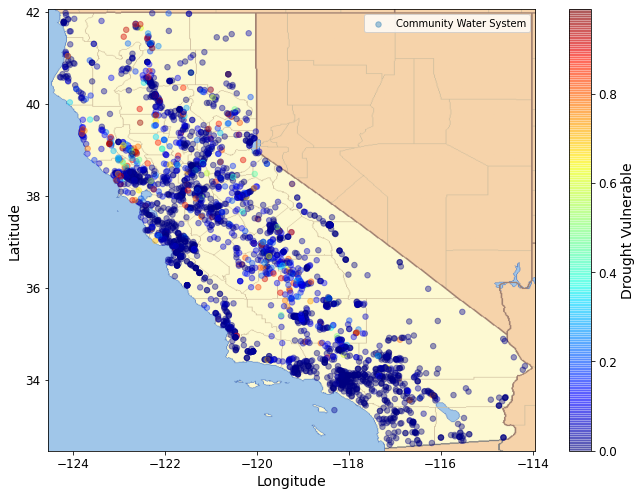

In [128]:
data_renamed = results.rename(columns={
    "Lat": "Latitude", "Long": "Longitude",
    #"population": "Population",
    "Prob_B": "Drought Vulnerable"})
data_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
             #s=data2["ServiceConnections"]/200, label="Number of Service Connections",
             s=30, label="Community Water System",
             c="Drought Vulnerable", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

save_fig("DroughtExperienced_plot")
plt.show()

In [129]:
results.to_csv("RF_prediction_results.csv")

In [130]:
from google.colab import files
files.download("RF_prediction_results.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [131]:
my_saved_RF_Model_Data2 = final_model

In [132]:
import joblib
joblib.dump(my_saved_RF_Model_Data2, "RFData2.pkl") #

['RF1Data2.pkl']

In [133]:
final_model_reloaded = joblib.load("RFData2.pkl")

In [134]:
from google.colab import files
files.download("RFData2.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>